In [2]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load all the data
data = LoadMLData(os.path.join(DATAPATH, "autosomal_estimates/perlocus", "autosomal_estimates_ml_filtered.bed.gz"))
stutter = pd.read_csv(os.path.join(DATAPATH, "autosomal_estimates/perlocus", "autosomal_stutter_ml.bed.gz"), names=["chrom","start","end","up","down","p"], sep="\t")
data = pd.merge(data, stutter, on=["chrom","start","end"])

lobref = pd.read_csv(os.path.join(DATAPATH, "ref", "lobstr_v3.0.2_hg19_ref_nochr.bed"), usecols=range(4),
                     names=["chrom","start","end","period"], sep="\t")
data = pd.merge(data, lobref, on=["chrom","start","end"])

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


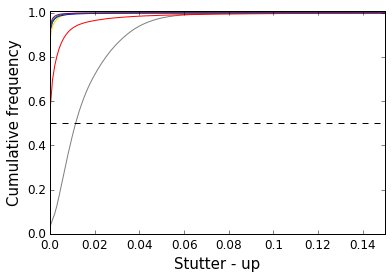

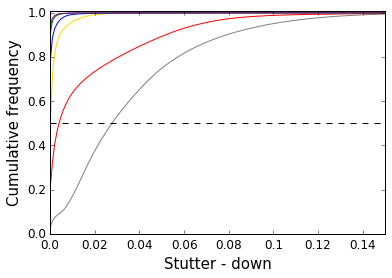

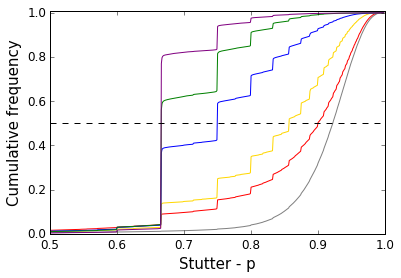

In [4]:
colordict = {
    1: "gray",
    2: "red",
    3: "gold",
    4: "blue",
    5: "green",
    6: "purple"
}

def PlotCDF(data, column, colordict, xlim=(0,0.15), figname=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for period in colordict.keys():
        x = data[data["period"]==period][column].values
        counts, bins = np.histogram(x, bins=np.arange(0,1,0.001))
        counts = counts*1.0/np.sum(counts)
        counts = np.cumsum(counts)
        ax.plot(bins[:-1], counts, color=colordict[period])
    ax.set_xlim(left=xlim[0], right=xlim[1])
    ax.set_ylim(bottom=0, top=1.01)   
    ax.axhline(y=0.5, color="black", linestyle="dashed")
    ax.set_xlabel("Stutter - " + column, size=15)
    ax.set_ylabel("Cumulative frequency", size=15)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    if figname is not None: fig.savefig(figname)
    
# Up - CDF by period
PlotCDF(data, "up", colordict, figname=os.path.join(PLOTDIR, "SupplementalFigure7_up.pdf"))

# Down - CDF by period
PlotCDF(data, "down", colordict, figname=os.path.join(PLOTDIR, "SupplementalFigure7_down.pdf"))

# Pgeom - CDF by period
PlotCDF(data, "p", colordict, xlim=(0.5,1), figname=os.path.join(PLOTDIR, "SupplementalFigure7_pgeom.pdf"))

In [6]:
# Print mean stutter value for each param by period
for period in colordict.keys():
    print period, np.median(data[data["period"]==period]["p"]), np.median(data[data["period"]==period]["up"]), np.median(data[data["period"]==period]["down"]) 
    print period, np.median(data[data["period"]==period].apply(lambda x: x["up"]+x["down"], 1))
    print period, np.median(data[data["period"]==period]["down"])/np.median(data[data["period"]==period]["up"])

1 0.923004 0.012387 0.028646
1 0.042056
1 2.31258577541
2 0.9002245 0.000741 0.004936
2 0.005924
2 6.66126855601
3 0.857143 0.000252 0.001068
3 0.001366
3 4.2380952381
4 0.75 0.000175 0.000389
4 0.000595
4 2.22285714286
5 0.666667 0.000183 0.000285
5 0.000478
5 1.55737704918
6 0.666667 0.000187 0.000207
6 0.000414
6 1.10695187166
